In [1]:
!pip install bs4


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#import 
import requests
from bs4 import BeautifulSoup

In [3]:
page = requests.get("http://dataquestio.github.io/web-scraping-pages/simple.html")

In [4]:
#let's feed the webpage to the parser 
soup = BeautifulSoup(page.content, 'html.parser')

In [5]:
soup

<!DOCTYPE html>

<html>
<head>
<title>A simple example page</title>
</head>
<body>
<p>Here is some simple content for this page.</p>
</body>
</html>

In [6]:
#bs dispose d'une méthode pour afficher le HTML de façon bien indentée
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   A simple example page
  </title>
 </head>
 <body>
  <p>
   Here is some simple content for this page.
  </p>
 </body>
</html>



In [7]:
soup.find('p')

<p>Here is some simple content for this page.</p>

In [8]:
soup.find_all('p')

[<p>Here is some simple content for this page.</p>]

In [9]:
soup.find('p').get_text()

'Here is some simple content for this page.'

In [10]:
# use the .strip() string method to remove leading and trailing characters
soup.find('p').get_text().strip()

'Here is some simple content for this page.'

In [11]:
#.get_text ne marche que sur les tags uniques, pas sur une liste résultant d'un 'find_all'
#Il faut donc slicer
soup.find_all('p')[0].get_text()

'Here is some simple content for this page.'

In [12]:
#chargeons une page plus un peu plus complexe
page = requests.get("http://dataquestio.github.io/web-scraping-pages/ids_and_classes.html")
soup = BeautifulSoup(page.content)
soup.find_all('p')

[<p class="inner-text first-item" id="first">
                 First paragraph.
             </p>,
 <p class="inner-text">
                 Second paragraph.
             </p>,
 <p class="outer-text first-item" id="second">
 <b>
                 First outer paragraph.
             </b>
 </p>,
 <p class="outer-text">
 <b>
                 Second outer paragraph.
             </b>
 </p>]

In [13]:
print(soup.prettify())

<html>
 <head>
  <title>
   A simple example page
  </title>
 </head>
 <body>
  <div>
   <p class="inner-text first-item" id="first">
    First paragraph.
   </p>
   <p class="inner-text">
    Second paragraph.
   </p>
  </div>
  <p class="outer-text first-item" id="second">
   <b>
    First outer paragraph.
   </b>
  </p>
  <p class="outer-text">
   <b>
    Second outer paragraph.
   </b>
  </p>
 </body>
</html>



In [14]:
soup.find_all('p', {"class":"outer-text"})[0].get_text().strip()

'First outer paragraph.'

In [15]:
soup.find_all('p', {"class":"outer-text", "id":"second"})[0].get_text().strip()

'First outer paragraph.'

In [16]:
# un id étant unique en HTML, on peut y accéder directement sans mentionner le tag
soup.find(id="first")

<p class="inner-text first-item" id="first">
                First paragraph.
            </p>

In [17]:
wikipedia_DS_url = "https://fr.wikipedia.org/wiki/Science_des_donn%C3%A9es"
wiki_raw = requests.get(wikipedia_DS_url)
soup = BeautifulSoup(wiki_raw.content)
str(soup)[:1000]

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" dir="ltr" lang="fr">\n<head>\n<meta charset="utf-8"/>\n<title>Science des données — Wikipédia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-dis

In [18]:
main_soup = soup.find("main")  # pas besoin de find_all car il n'y a qu'un main
str(main_soup)[:1000]

'<main class="mw-body" id="content" role="main">\n<header class="mw-body-header vector-page-titlebar">\n<nav aria-label="Sommaire" class="vector-toc-landmark" role="navigation">\n<div class="vector-dropdown vector-page-titlebar-toc vector-button-flush-left" id="vector-page-titlebar-toc">\n<input aria-haspopup="true" aria-label="Basculer la table des matières" class="vector-dropdown-checkbox" data-event-name="ui.dropdown-vector-page-titlebar-toc" id="vector-page-titlebar-toc-checkbox" role="button" type="checkbox"/>\n<label aria-hidden="true" class="vector-dropdown-label cdx-button cdx-button--fake-button cdx-button--fake-button--enabled cdx-button--weight-quiet cdx-button--icon-only" for="vector-page-titlebar-toc-checkbox" id="vector-page-titlebar-toc-label"><span class="vector-icon mw-ui-icon-listBullet mw-ui-icon-wikimedia-listBullet"></span>\n<span class="vector-dropdown-label-text">Basculer la table des matières</span>\n</label>\n<div class="vector-dropdown-content">\n<div class="v

In [19]:
links = main_soup.find_all("a")

In [20]:
links = main_soup.find_all("a", href=True, title=True)
links[:10]

[<a class="interlanguage-link-target" href="https://ar.wikipedia.org/wiki/%D8%B9%D9%84%D9%85_%D8%A7%D9%84%D8%A8%D9%8A%D8%A7%D9%86%D8%A7%D8%AA" hreflang="ar" lang="ar" title="علم البيانات – arabe"><span>العربية</span></a>,
 <a class="interlanguage-link-target" href="https://az.wikipedia.org/wiki/Veril%C9%99nl%C9%99r_elmi" hreflang="az" lang="az" title="Verilənlər elmi – azerbaïdjanais"><span>Azərbaycanca</span></a>,
 <a class="interlanguage-link-target" href="https://bg.wikipedia.org/wiki/%D0%9D%D0%B0%D1%83%D0%BA%D0%B0_%D0%B7%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D0%B8%D1%82%D0%B5" hreflang="bg" lang="bg" title="Наука за данните – bulgare"><span>Български</span></a>,
 <a class="interlanguage-link-target" href="https://bn.wikipedia.org/wiki/%E0%A6%89%E0%A6%AA%E0%A6%BE%E0%A6%A4%E0%A7%8D%E0%A6%A4_%E0%A6%AC%E0%A6%BF%E0%A6%9C%E0%A7%8D%E0%A6%9E%E0%A6%BE%E0%A6%A8" hreflang="bn" lang="bn" title="উপাত্ত বিজ্ঞান – bengali"><span>বাংলা</span></a>,
 <a class="interlanguage-link-target" href="https://ca.wi

In [21]:
#utilisons la méthode startswith
'Bonjour'.startswith("a")

False

In [22]:
#meme méthode en utilisant une fonctions lambda
links = main_soup.find_all("a", href=lambda link: link and link.startswith("/wiki/"), title=True)

In [23]:
print(links[:5])

[<a accesskey="c" href="/wiki/Science_des_donn%C3%A9es" title="Voir le contenu de la page [c]"><span>Article</span></a>, <a accesskey="t" href="/wiki/Discussion:Science_des_donn%C3%A9es" rel="discussion" title="Discussion au sujet de cette page de contenu [t]"><span>Discussion</span></a>, <a accesskey="j" href="/wiki/Sp%C3%A9cial:Pages_li%C3%A9es/Science_des_donn%C3%A9es" title="Liste des pages liées qui pointent sur celle-ci [j]"><span>Pages liées</span></a>, <a accesskey="k" href="/wiki/Sp%C3%A9cial:Suivi_des_liens/Science_des_donn%C3%A9es" rel="nofollow" title="Liste des modifications récentes des pages appelées par celle-ci [k]"><span>Suivi des pages liées</span></a>, <a accesskey="u" href="/wiki/Aide:Importer_un_fichier" title="Téléverser des fichiers [u]"><span>Téléverser un fichier</span></a>]


In [24]:
liens = []
for l in links:
    liens.append(l['href'])

In [25]:
liens[:5]

['/wiki/Science_des_donn%C3%A9es',
 '/wiki/Discussion:Science_des_donn%C3%A9es',
 '/wiki/Sp%C3%A9cial:Pages_li%C3%A9es/Science_des_donn%C3%A9es',
 '/wiki/Sp%C3%A9cial:Suivi_des_liens/Science_des_donn%C3%A9es',
 '/wiki/Aide:Importer_un_fichier']

In [26]:
from urllib.parse import unquote


decoded_urls = [unquote(url) for url in liens]

for i,url in enumerate(decoded_urls):
    print(url)
    if i==4: break

/wiki/Science_des_données
/wiki/Discussion:Science_des_données
/wiki/Spécial:Pages_liées/Science_des_données
/wiki/Spécial:Suivi_des_liens/Science_des_données
/wiki/Aide:Importer_un_fichier


In [27]:
# Dans un tag, on peut accéder aux attributs avec le slicing habituel
links[0]['href']

'/wiki/Science_des_donn%C3%A9es'

In [28]:
list_of_article_links = [ link["href"] for link in links ]
list_of_article_links = [unquote(url) for url in list_of_article_links]; list_of_article_links[:10]

['/wiki/Science_des_données',
 '/wiki/Discussion:Science_des_données',
 '/wiki/Spécial:Pages_liées/Science_des_données',
 '/wiki/Spécial:Suivi_des_liens/Science_des_données',
 '/wiki/Aide:Importer_un_fichier',
 '/wiki/Spécial:Pages_spéciales',
 '/wiki/Science',
 '/wiki/Architecte_de_données',
 '/wiki/Donnée',
 '/wiki/Modèle:Infobox_Discipline']

In [30]:
# on va récupérer le contenu du premier lien
example_url = list_of_article_links[0]
requests.get(example_url).content

MissingSchema: Invalid URL '/wiki/Science_des_données': No scheme supplied. Perhaps you meant https:///wiki/Science_des_données?

In [31]:
prefix = "https://fr.wikipedia.org"
prefix + list_of_article_links[0] # concaténation rapide

'https://fr.wikipedia.org/wiki/Science_des_données'

In [32]:
first_article_content = requests.get(prefix + list_of_article_links[0]).content
first_article_content[:1000]

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" lang="fr" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Science des donn\xc3\xa9es \xe2\x80\x94 Wikip\xc3\xa9dia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-fea

In [33]:
# Essayons de rendre nos noms de variables le plus clair possible
list_article_links_complete = [prefix + extension for extension in list_of_article_links]
list_article_links_complete[:10]

['https://fr.wikipedia.org/wiki/Science_des_données',
 'https://fr.wikipedia.org/wiki/Discussion:Science_des_données',
 'https://fr.wikipedia.org/wiki/Spécial:Pages_liées/Science_des_données',
 'https://fr.wikipedia.org/wiki/Spécial:Suivi_des_liens/Science_des_données',
 'https://fr.wikipedia.org/wiki/Aide:Importer_un_fichier',
 'https://fr.wikipedia.org/wiki/Spécial:Pages_spéciales',
 'https://fr.wikipedia.org/wiki/Science',
 'https://fr.wikipedia.org/wiki/Architecte_de_données',
 'https://fr.wikipedia.org/wiki/Donnée',
 'https://fr.wikipedia.org/wiki/Modèle:Infobox_Discipline']

In [55]:
import pandas as pd

In [56]:
pd.DataFrame(list_article_links_complete, columns=['liens'])

,liens
0,https://fr.wikipedia.org/wiki/Science_des_données
1,https://fr.wikipedia.org/wiki/Discussion:Scien...
2,https://fr.wikipedia.org/wiki/Spécial:Pages_li...
3,https://fr.wikipedia.org/wiki/Spécial:Suivi_de...
4,https://fr.wikipedia.org/wiki/Aide:Importer_un...
...,...
328,https://fr.wikipedia.org/wiki/Catégorie:Portai...
329,https://fr.wikipedia.org/wiki/Catégorie:Portai...
330,https://fr.wikipedia.org/wiki/Catégorie:Projet...
331,https://fr.wikipedia.org/wiki/Catégorie:Portai...


In [57]:
from tqdm.notebook import tqdm # pour afficher des barres de chargement
import numpy as np # pour calculer des médianes

In [63]:
### Notre analyse

articles_number_notes = []

for article_link in tqdm(list_article_links_complete[:50]): # intégrer tdqm permet d'afficher une barre de progression de la boucle

    # constitution de notre soup de façon classique
    first_article_content = requests.get(article_link).content
    first_article_soup = BeautifulSoup(first_article_content, 'html.parser')

    # Certains articles n'auront ni notes ni références, ils donneront une erreur
    # Ces erreurs seront gérés par la commande except
    try:

        # On parcourt l'arbre pour trouver les éléments dans la liste référence
        notes_et_references = (first_article_soup
                               .find('main')
                               .find("ol", {"class": "references"})
                               .find_all("li")
                              )
        # on stocke dans une liste le nombre de références
        number_of_notes = len(notes_et_references)
        articles_number_notes.append(number_of_notes)

    except AttributeError:
        print("No note or reference in article", article_link)
        articles_number_notes.append(0)   # Il n'y a pas de notes donc on ajoute 0 à la liste.

print("\nMedian number of notes per article is", np.median(articles_number_notes))
print("Mean number of notes per article is", np.mean(articles_number_notes))
print("Stdev of number of notes per article is", np.std(articles_number_notes))

Exception ignored in: <function tqdm.__del__ at 0x00000233B0CFD630>
Traceback (most recent call last):
  File "D:\laragon\bin\python\python-3.10\lib\site-packages\tqdm\std.py", line 1148, in __del__
  File "D:\laragon\bin\python\python-3.10\lib\site-packages\tqdm\notebook.py", line 279, in close
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

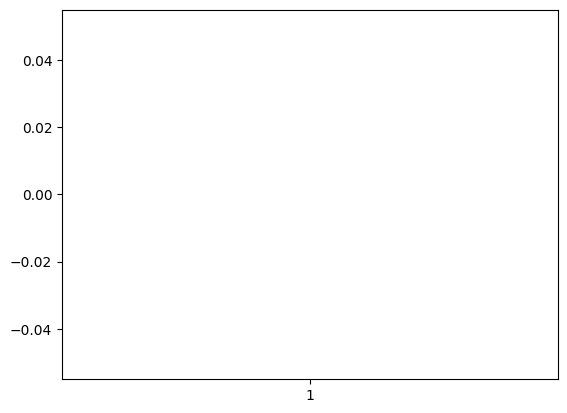

In [64]:
import matplotlib.pyplot as plt

plt.boxplot(articles_number_notes, patch_artist=True);

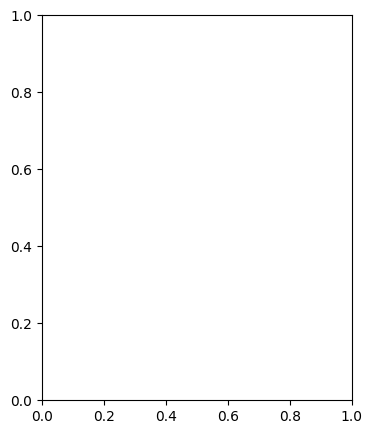

In [65]:
import seaborn as sns
plt.figure(figsize=(4,5))
sns.violinplot(data=articles_number_notes);